# <center> Shopping Habits : Customer Behaviour Analysis
### Project Overview

- Objective: To perform Customer Behaviour Analysis on the given dataset to draw impactful patterns and trends to decode customer practices to boost sales and promotional offers.
  
- Structure of Project:    1. Import Libraries
    2. Data
    3. Descriptive Analysis
    4. Product Analysis
    5. Customer Engagement Metrics
    6. Customer Revenue Analysis


---

### Importing Libraries 

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [8]:
df = pd.read_csv(r'shopping_behavior_updated.csv')

In [9]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [10]:
df.shape

(3900, 18)

In [11]:
print('The information related to dataset columns:')
df.info()

The information related to dataset columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 

In [12]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [13]:
print('Duplicate values in dataset:', df.duplicated().sum())

Duplicate values in dataset: 0


In [14]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


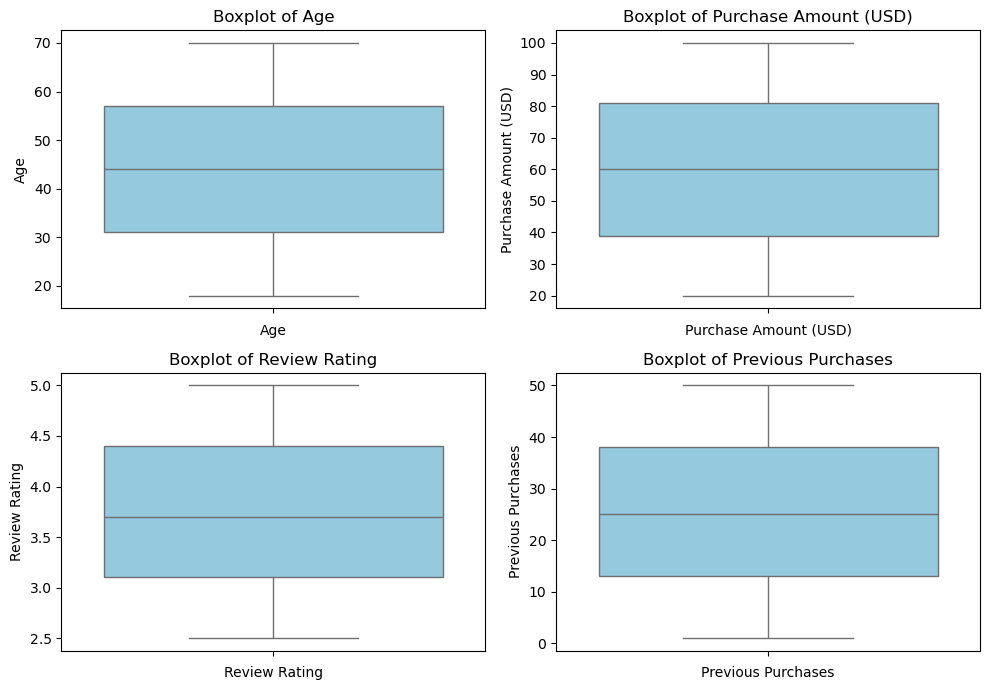

In [15]:
# Check for the presence of any outliers 

data = df[['Age','Purchase Amount (USD)', 'Review Rating','Previous Purchases']]

fig,ax = plt.subplots(2,2,figsize= (10,7))
ax = ax.flatten()
for i, col in enumerate(data.columns):
    sns.boxplot(data=data[col],ax=ax[i], color='skyblue')
    ax[i].set_title(f'Boxplot of {col}')
    ax[i].set_xlabel(col)
plt.tight_layout()
plt.show()

- No outliers are present in the dataset.

---

## 1. Descriptive Analysis

In this section we will analyze `Age`, `Gender`, `Product Category`, `Location`, `Season`, `Payment Method` and `Shipping type` features of the dataset. 

#### Distribution of Age

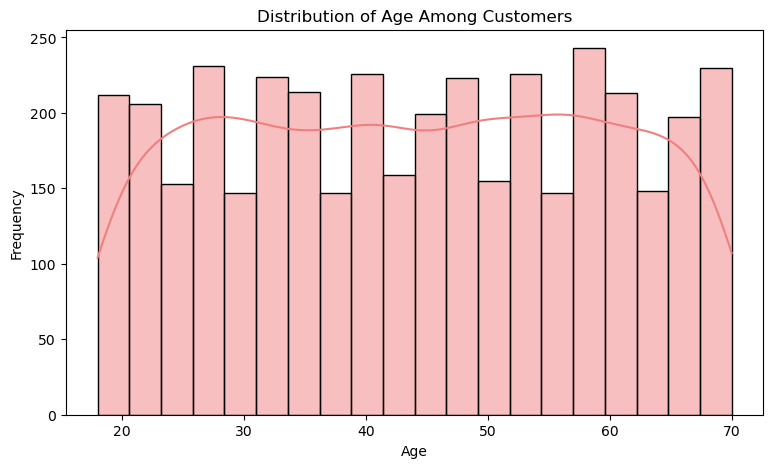

In [21]:
# Plot the distribution of Age

plt.figure(figsize=(9,5))
sns.histplot(df['Age'], bins=20, kde=True, color='lightcoral', edgecolor='black')
plt.title('Distribution of Age Among Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Popular Product Category according to Age
- In order to analyze which product category is popular across age. Let's first divide the `Age` into different age group and then examine which product category is popular across which age group.
- The mininum and maximum age across the dataset is 18 and 70 respectively, so we will divide our age groups keeping these values as upper and lower limit.

In [23]:
# Define the age group
age_group = {
    '18-25': range(18, 26),
    '26-35': range(26, 36),
    '36-50': range(36, 51),
    '51-60': range(51, 61), 
    '61+': range(61, 70)
    }

# Count individuals in each age group 
age_counts = {age_range: df[df['Age'].isin(age_group[age_range])]['Age'].count() for age_range in age_group}

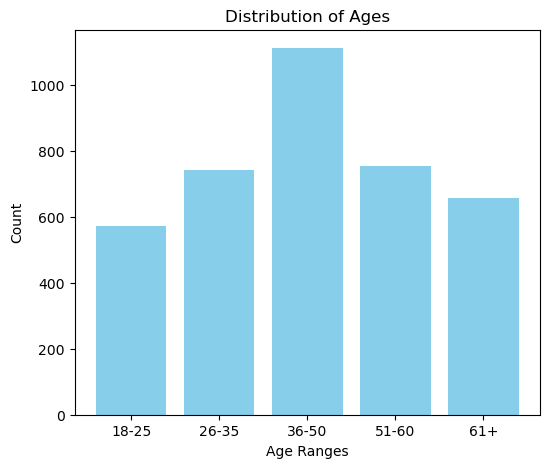

In [24]:
# Plot the distribution of age group
plt.figure(figsize=(6,5))
plt.bar(age_counts.keys(), age_counts.values(), color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.show()

- The majority of the customers falls within the 36-50 age group.

In [26]:
# Create a new DataFrame to store the age group and their counts
age_group_counts = []

for age_range in age_group:
    count = df[df['Age'].isin(age_group[age_range])]['Category'].value_counts().reset_index()
    count.columns = ['Category', 'Count']
    count['Age_Group'] = age_range
    age_group_counts.append(count)

# Concatenate all age group counts into a single DataFrame
age_group_df = pd.concat(age_group_counts, ignore_index=True)
age_group_df

,Category,Count,Age_Group
0,Clothing,269,18-25
1,Accessories,172,18-25
2,Footwear,79,18-25
3,Outerwear,51,18-25
4,Clothing,337,26-35
5,Accessories,243,26-35
6,Footwear,108,26-35
7,Outerwear,54,26-35
8,Clothing,480,36-50
9,Accessories,356,36-50


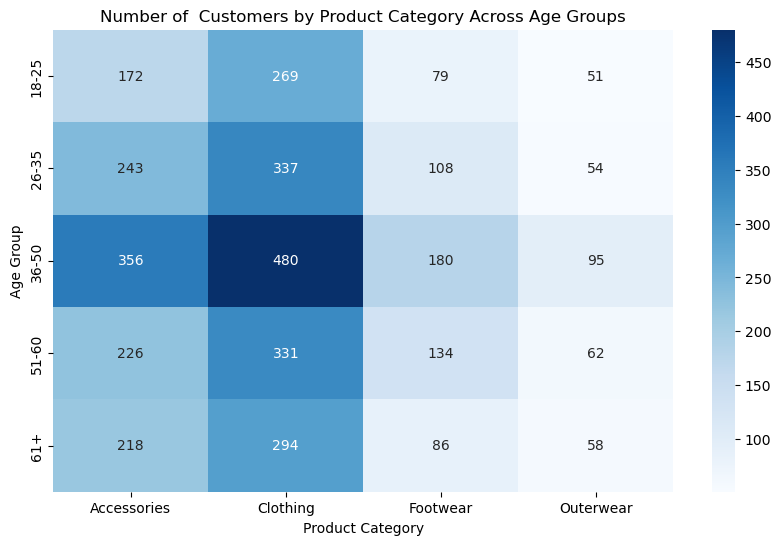

In [27]:
# Plot a heatmap to visualize the count of customers for product categories across age groups

plt.figure(figsize=(10,6))
df_heatmap = age_group_df.pivot_table(values='Count',index='Age_Group',columns='Category',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True,cmap = 'Blues', fmt='.0f')
plt.title('Number of  Customers by Product Category Across Age Groups')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

- The `Clothing` and `Accessories` area has a large customer base of people between the ages of `36-50`.

#### Customers from Top 10 Locations

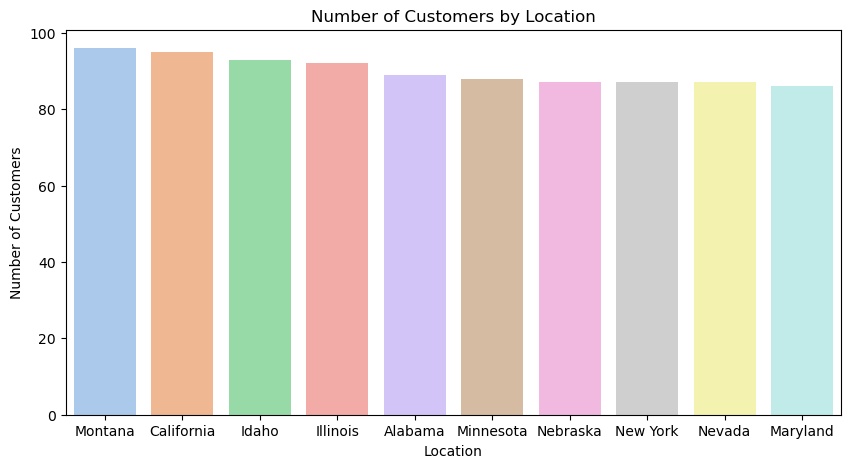

In [30]:
# Plot the count of customers for top 10 location

top_loc = df['Location'].value_counts().iloc[:10].index

plt.figure(figsize=(10,5))
sns.countplot(x='Location', data=df, order=top_loc, palette='pastel')
plt.title('Number of Customers by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()

- Top 5 location having high number of customers are Montana, California, Idaho, Illinois and Alabama.

#### Distribution of Gender and Category

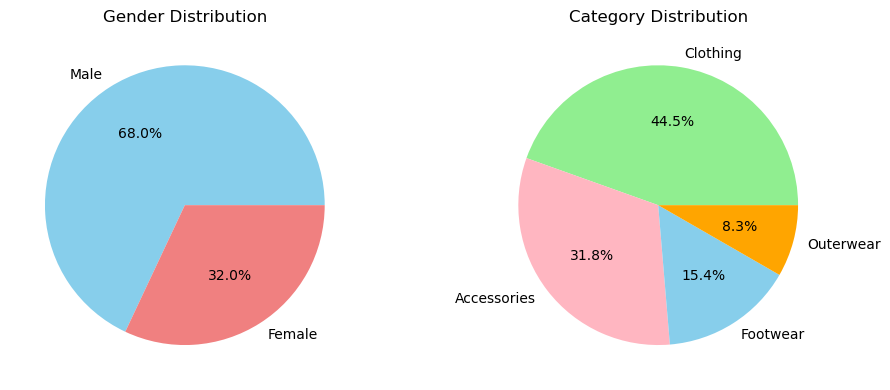

In [33]:
# Plotting Gender and Category distribution

cat_counts = df['Category'].value_counts()
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightpink','skyblue','orange'])
plt.title('Category Distribution')

plt.tight_layout()
plt.show()

- It is evident from the gender distribution plot that the male and female population account for **68%** and **32%**, respectively.
- The dominant category of products is `Clothing` with 44.5%, followed by `Accessories` accounting for 31.8%.

#### Payment Method

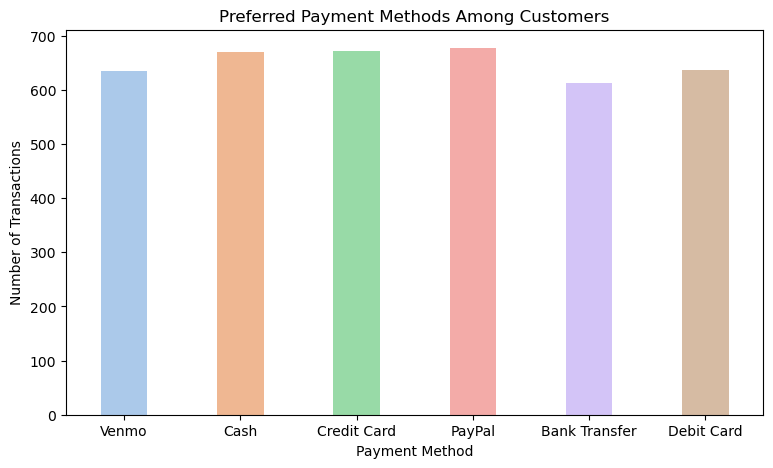

In [36]:
# Plot the count of transactions for each payment method

plt.figure(figsize=(9,5))
sns.countplot(x='Payment Method', data=df, palette='pastel',width=0.4)
plt.title('Preferred Payment Methods Among Customers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

- `PayPal`, `Credit Card` and `Cash` are the three popular payment method.

#### Shipping Type

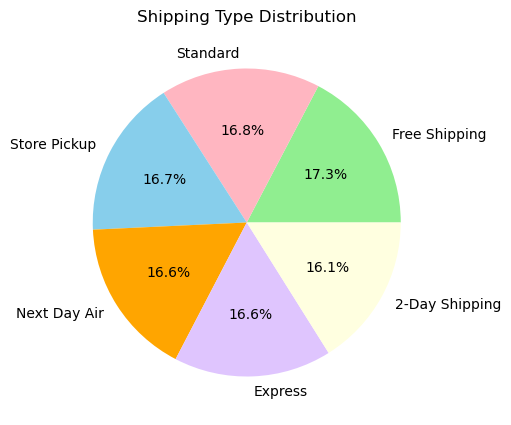

In [39]:
# Plot the count of shipping type 

ship_counts = df['Shipping Type'].value_counts()

plt.figure(figsize=(9,5))
plt.pie(ship_counts, labels=ship_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'lightpink','skyblue','orange','#dfc5fe','lightyellow'])
plt.title('Shipping Type Distribution')
plt.show()

- All the shipping types are almost equally distributed.

---

## 2. Product Analysis

Let's explore the `Category`,`Item Purchased` and their relation with other features in the dataset to obtain insights. 

#### Popular Product Category according to Gender

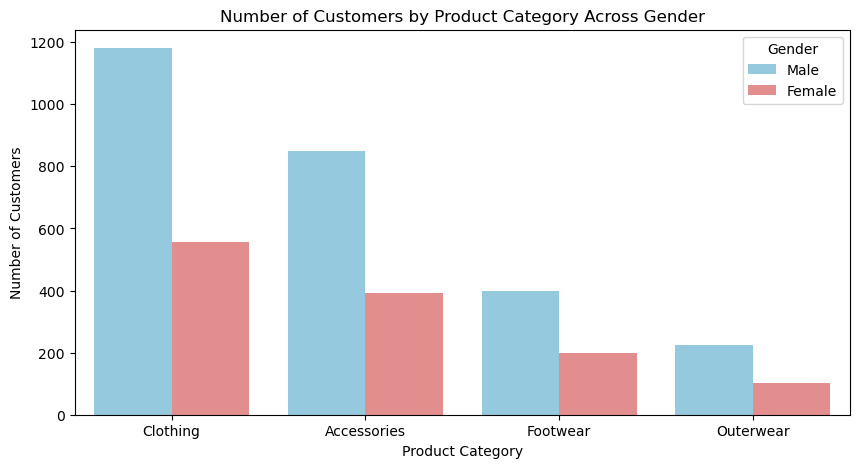

In [45]:
# Plot the count of gender of customers for product categories

pro_gen = df['Category'].value_counts().index

plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df, order=pro_gen, palette=['skyblue','lightcoral'], hue='Gender')
plt.title('Number of Customers by Product Category Across Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.show()

- `Clothing` and `Accessories` are the top 2 product categories according to both male and female customers.

#### Seasonal Product Category 

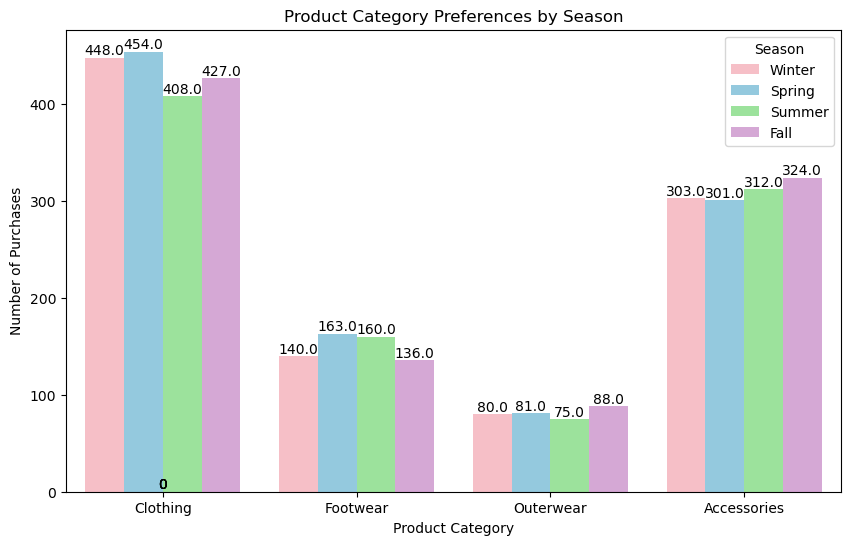

In [48]:
# Plot Product Category according to Seasons

plt.figure(figsize=(10,6))
cmap = ["#F72585", "#7209B7","#4361EE", "#3A0CA3", "#4CC9F0"]

ax = sns.countplot(x='Category', hue='Season', data=df, palette=['lightpink','skyblue','lightgreen','plum'])
plt.title('Product Category Preferences by Season')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.legend(title='Season')
# ['lightpink','skyblue','lightgreen','plum']
# Adding annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', 
                va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

- `Clothing` and `Accessories` category have the highest number of products sold.
- During `Spring` and `Fall` highest products are sold acorss all category of products.

#### Item Purchased

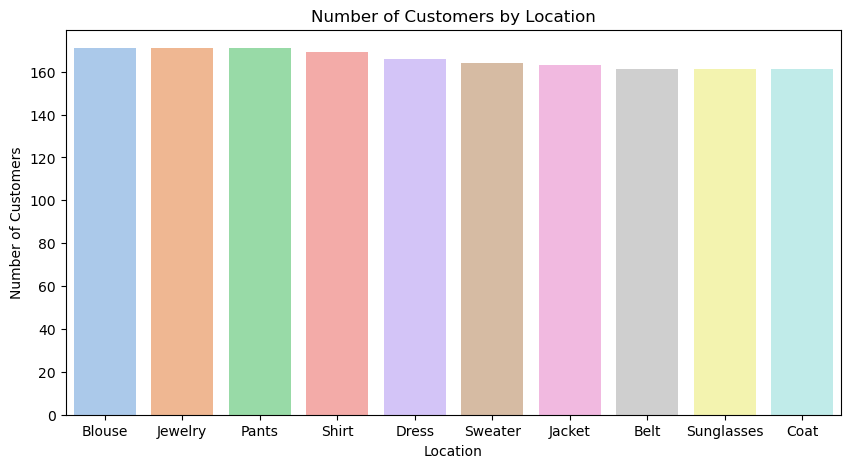

In [51]:
# Plot Top 10 Item Purchased across all category

top_loc = df['Item Purchased'].value_counts().iloc[:10].index

plt.figure(figsize=(10,5))
sns.countplot(x='Item Purchased', data=df, order=top_loc, palette='pastel')
plt.title('Number of Customers by Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()

#### Top Item sold in Clothing and Accessories Categories

In [53]:
# Create a dataframe containing columns of interest

item = df[(df['Category'] == 'Clothing') | (df['Category'] == 'Accessories')][['Category','Item Purchased', 'Purchase Amount (USD)']]
item.head()

,Category,Item Purchased,Purchase Amount (USD)
0,Clothing,Blouse,53
1,Clothing,Sweater,64
2,Clothing,Jeans,73
4,Clothing,Blouse,49
6,Clothing,Shirt,85


In [54]:
# Check and print top 5 items purchased from 'Clothing' category

clothing_items = item[item['Category'] == 'Clothing']
cloth_count = clothing_items['Item Purchased'].value_counts().iloc[:5]

if not clothing_items.empty:
    print('Top 5 items Purchased in Clothing Category are:')
    print(cloth_count)

Top 5 items Purchased in Clothing Category are:
Item Purchased
Blouse     171
Pants      171
Shirt      169
Dress      166
Sweater    164
Name: count, dtype: int64


- Top 5 high selling items in Clothing Category are : Blouse, Pants, Shirts, Dress and Sweater.

In [56]:
# Check and print top 5 items purchased from 'Accessories' category 

accessories_items = item[item['Category'] == 'Accessories']
access_count = accessories_items['Item Purchased'].value_counts().iloc[:5]

if not accessories_items.empty:
    print('Top 10 items Purchased in Accessories Category are:')
    print(access_count)

Top 10 items Purchased in Accessories Category are:
Item Purchased
Jewelry       171
Sunglasses    161
Belt          161
Scarf         157
Hat           154
Name: count, dtype: int64


 - Top 5 high selling items in Accessories Category are : Jewelry, Sunglasses, Belt, Scarf and Hat.

#### Size

In [59]:
df['Size'].value_counts(normalize=True)*100

Size
M     45.0
L     27.0
S     17.0
XL    11.0
Name: proportion, dtype: float64

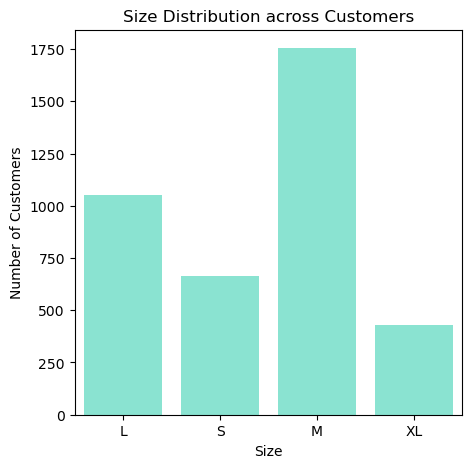

In [60]:
# Plot the frequency of Size

plt.figure(figsize=(5,5))
sns.countplot(x='Size', data=df, color ='#7bf2da')
plt.title('Size Distribution across Customers')
plt.ylabel('Number of Customers')
plt.show()

- The M size was opted by 45% of the customers. 

#### High Selling Color

In [63]:
# Calculate top 10 selling colors

top_color = round(df['Color'].value_counts(normalize=True)*100,2)[:10]

print('Top 10 colors are:\n', top_color,'%')

Top 10 colors are:
 Color
Olive     4.54
Yellow    4.46
Silver    4.44
Teal      4.41
Green     4.33
Black     4.28
Cyan      4.26
Violet    4.26
Gray      4.08
Maroon    4.05
Name: proportion, dtype: float64 %


---

## 3. Customer Engagement Metrics

In this section we will review the key performance indicators (KPI) such as `Review Rating`, `Subscription Status`, `Discount Applied`, and `Promo Code`.

#### Correlation between features

In [68]:
# Create dataframe of columns in interest
cem = df[['Gender','Age','Review Rating', 'Subscription Status', 'Discount Applied', 'Promo Code Used']]

In [69]:
 # Encoding the categorical columns of dataframe cem

corr_df = cem.copy()
corr_df['Gender'] = corr_df['Gender'].map({'Male': 0, 'Female': 1})
corr_df['Subscription Status'] = corr_df['Subscription Status'].map({'No': 0, 'Yes': 1})
corr_df['Discount Applied'] = corr_df['Discount Applied'].map({'No': 0, 'Yes': 1})
corr_df['Promo Code Used'] = corr_df['Promo Code Used'].map({'No': 0, 'Yes': 1})

In [70]:
corr_df.head()

,Gender,Age,Review Rating,Subscription Status,Discount Applied,Promo Code Used
0,0,55,3.1,1,1,1
1,0,19,3.1,1,1,1
2,0,50,3.1,1,1,1
3,0,21,3.5,1,1,1
4,0,45,2.7,1,1,1


In [71]:
# Calculate correlation between features of dataframe

# Function to perform Chi-Square test
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

# Perform Chi-Square test for each pair of categorical variables
results = []
for i, col1 in enumerate(corr_df.columns):
    for col2 in corr_df.columns[i+1:]:
        chi2, p = chi_square_test(corr_df, col1, col2)
        results.append((col1, col2, chi2, p))

In [72]:
# Display the correlation between variables in dataframe
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi-Square', 'p-value'])
print(results_df)

             Variable 1           Variable 2   Chi-Square        p-value
0                Gender                  Age    62.592858   1.491871e-01
1                Gender        Review Rating    18.305679   8.291424e-01
2                Gender  Subscription Status   676.794404  3.326863e-149
3                Gender     Discount Applied  1381.941346  1.764538e-302
4                Gender      Promo Code Used  1381.941346  1.764538e-302
5                   Age        Review Rating  1259.196786   7.868783e-01
6                   Age  Subscription Status    47.547099   6.494589e-01
7                   Age     Discount Applied    50.093292   5.492121e-01
8                   Age      Promo Code Used    50.093292   5.492121e-01
9         Review Rating  Subscription Status    20.909144   6.976647e-01
10        Review Rating     Discount Applied    24.740702   4.769784e-01
11        Review Rating      Promo Code Used    24.740702   4.769784e-01
12  Subscription Status     Discount Applied  1908.

- #### Key Pointers:
    - **A low p-value (typically < 0.05) indicates a statistically significant association between the variables.**
    - `Gender`: Significantly associated with `subscription status`, `discount applied`, and `promo code used`, but not with `review rating`.
    - **Discounts and Promo Codes: Very strong association, suggesting that discounts and promo codes often go hand in hand.**
    - `Review Rating`: Not significantly associated with any of the tested variables.
    - `Age` : Not significantly associated with any of the tested variables.
    - `Subscription Status`: Strongly associated with `discount applied` and `promo code used`.


#### Review Rating

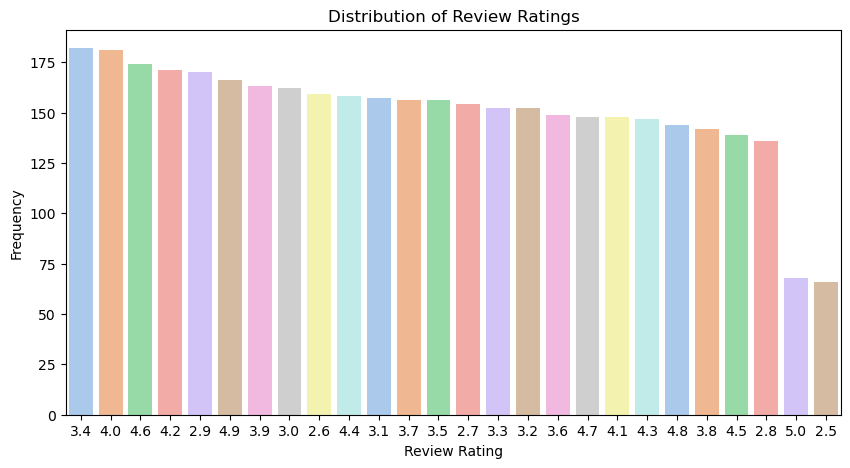

In [76]:
# Plot the distribution of review ratings provided by customers
plt.figure(figsize=(10,5))
sns.countplot(x='Review Rating', data=data, order=data['Review Rating'].value_counts().index, palette='pastel')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

In [77]:
# Calculate the average review rating provided by customers

avg_rating = round(df['Review Rating'].mean(),2)

print("Average Review Rating provided by the customers: ", avg_rating)

Average Review Rating provided by the customers:  3.75


In [78]:
# Calculate the number of customer for different review rating group

rates = {
    'Less than 3' : np.arange(0,3,0.1),
    '3-3.9' : np.arange(3,4,0.1),
    '4-4.9' : np.arange(4,5,0.1),
    'Equal to 5': [5]
}

bins = [0, 3, 4, 5, 6]  
rates = pd.cut(df['Review Rating'], bins=bins, labels=rates.keys(), right=False)
rating = rates.value_counts().to_dict()

In [79]:
rating

{'4-4.9': 1576, '3-3.9': 1571, 'Less than 3': 685, 'Equal to 5': 68}

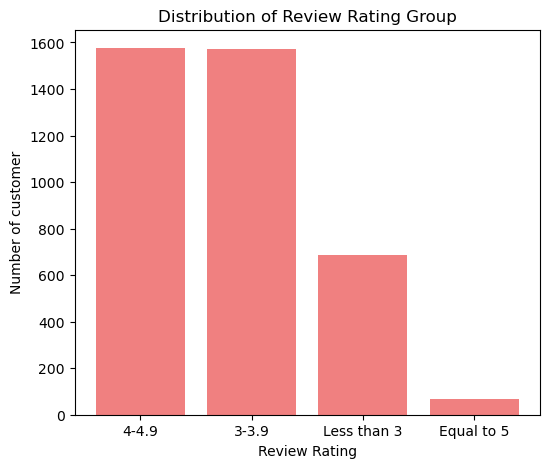

In [80]:
# Plot the distribution of 'Review Rating' group

plt.figure(figsize=(6,5))
plt.bar(rating.keys(), rating.values(), color='lightcoral')
plt.title('Distribution of Review Rating Group')
plt.xlabel('Review Rating')
plt.ylabel('Number of customer')
plt.show()

- The percentage of consumers who have given a `rating of 5` is **1.74%**, while roughly **40.41%** fall between the range of `4-4.9`. 

In [82]:
# Find the products and product category having review rating more than 4

filtered_df = df[(df['Review Rating'] >= 4) & (df['Review Rating'] <= 5)][['Category', 'Item Purchased']] 
count_df  = filtered_df.value_counts().to_frame('counts').reset_index()

In [83]:
count_df.head() 

,Category,Item Purchased,counts
0,Footwear,Sandals,80
1,Accessories,Jewelry,74
2,Outerwear,Jacket,73
3,Accessories,Hat,71
4,Accessories,Belt,70


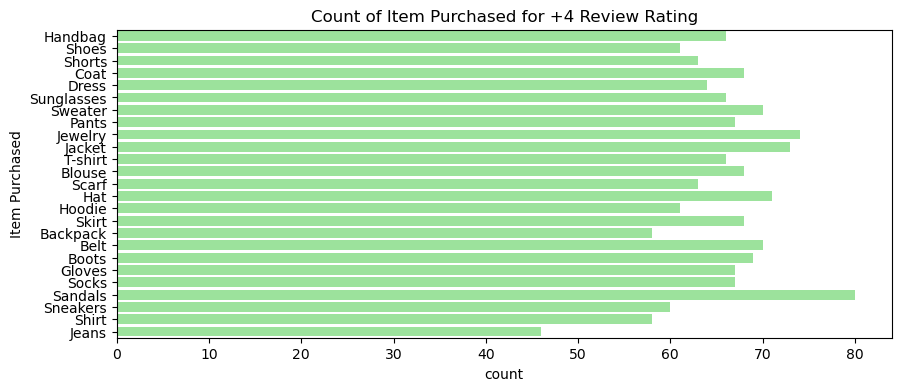

In [84]:
# Plot the count of item purchased having review rating from 4 to 5

plt.figure(figsize=(10,4))
sns.countplot(data=filtered_df['Item Purchased'], color='lightgreen')
plt.title('Count of Item Purchased for +4 Review Rating')
plt.show()

- *Sandals, jewelry, jackets, hats, and belts are the five most popular items bought when the 'Review Rating' falls between 4-5*.
- Despite being the most popular category, clothing does not rank among the top 5 items purchased based on review ratings of 4-5.

#### Subscription Status	

In [87]:
# Calculate the proportion of customers who opted for subscription services

subscription_proportion = df['Subscription Status'].value_counts(normalize=True).get('Yes', 0)*100
print("Customers who opt for subscription services:", subscription_proportion,'%')

Customers who opt for subscription services: 27.0 %


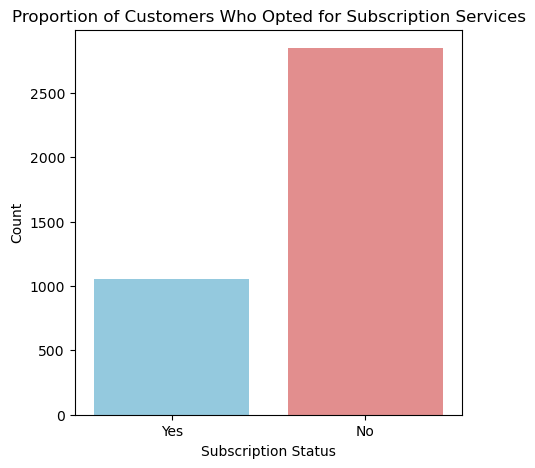

In [88]:
# Plot the proportion of customers who opt for subscription services

plt.figure(figsize=(5,5))
sns.countplot(x='Subscription Status', data=df, palette=['skyblue','lightcoral'], hue='Subscription Status')
plt.title('Proportion of Customers Who Opted for Subscription Services')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

- While **27%** of customers chose subscription services, 73% did not. 

In [90]:
# Calculate percentage of customers opted for subscription on the basis of gender

subs_gender = pd.crosstab(df['Gender'], df['Subscription Status'], margins=False)
subs_gender

Subscription Status,No,Yes
Gender,,
Female,1248,0
Male,1599,1053


- It is evident that 0 female opted for subscription services, whereas 1053 male (27%) opted for subscription services, Hence the male population should be targeted in order to boost sales.

In [92]:
# Calculate average previous purchases for customers with and without subscription status

avg_previous_pur = df.groupby('Subscription Status')['Previous Purchases'].mean()

print("Average previous purchases for customers with and without subscription status:\n")
print(avg_previous_pur)

Average previous purchases for customers with and without subscription status:

Subscription Status
No     25.080436
Yes    26.084520
Name: Previous Purchases, dtype: float64


In [93]:
# Calculate average purchase amount for customers with and without subscription status

avg_purchase_amt = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

print("Average purchase amount (USD) for customers with and without subscription status:\n")
print(avg_purchase_amt)

Average purchase amount (USD) for customers with and without subscription status:

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64


- The average purchase amount when the customers have opted for subscription services is approximately **$59.5**.

#### Discount Applied

In [96]:
# Calculate the frequency of promotional discounts applied to purchases

discount_frequency = df['Discount Applied'].value_counts(normalize=True)*100
print("Frequency of promotional discounts applied to purchases:", discount_frequency)

Frequency of promotional discounts applied to purchases: Discount Applied
No     57.0
Yes    43.0
Name: proportion, dtype: float64


- Only **43%** of consumers really used the offered discounts. 

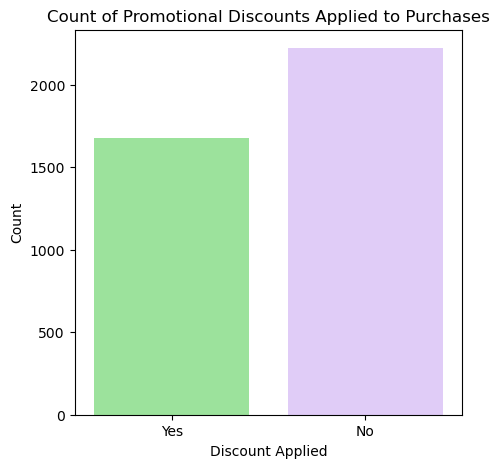

In [98]:
# Plot the frequency of promotional discounts applied to purchases
plt.figure(figsize=(5,5))
sns.countplot(x='Discount Applied', data=df, palette=['lightgreen','#dfc5fe'])
plt.title('Count of Promotional Discounts Applied to Purchases')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.show()

In [99]:
# Calculate average purchase amount for customers with and without subscription status

avg_purchase_amt = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

print("Average purchase amount (USD) for customers with and without subscription status:\n")
print(avg_purchase_amt)

Average purchase amount (USD) for customers with and without subscription status:

Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64


- The average purchase amount when the customers have applied discounts is approximately **$59.28**.

#### Promotion Code

In [102]:
# Count the frequency of promo codes used

print("Patterns in the use of promo codes:\n", df['Promo Code Used'].value_counts(normalize=True)*100)

Patterns in the use of promo codes:
 Promo Code Used
No     57.0
Yes    43.0
Name: proportion, dtype: float64


- Only **43%** of consumers really used the provided promo code. 

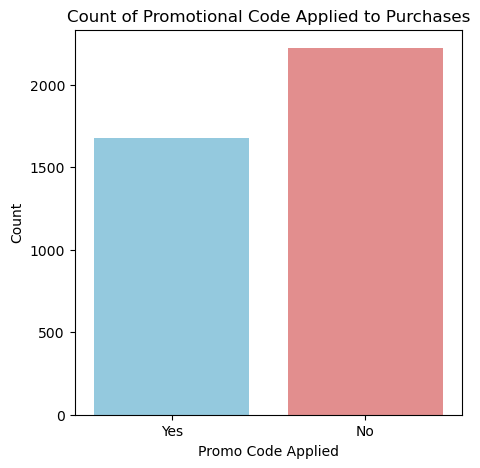

In [104]:
# Plot the patterns in the use of promo codes
plt.figure(figsize=(5,5))
sns.countplot(x='Promo Code Used', data=df, palette=['skyblue','lightcoral'])
plt.title('Count of Promotional Code Applied to Purchases')
plt.xlabel('Promo Code Applied')
plt.ylabel('Count')
plt.show()

In [105]:
# Calculate percentage of customers opted for subscription on the basis of gender

subs_gender = pd.crosstab(df['Gender'], df['Promo Code Used'])
subs_gender

Promo Code Used,No,Yes
Gender,,
Female,1248,0
Male,975,1677


- About 1677 (~43%) male customers used the promo code where as 0 female population used the promo code.

---

## 4. Customer Revenue Analysis

In this last part we will evaluate the revenue generated by various item purchased and other factors affecting the revenue.

In [110]:
# Calculate the average purchase amount per transaction

average_purchase_amount = df['Purchase Amount (USD)'].mean()

print("Average Purchase Amount per Transaction: ${:.2f}".format(average_purchase_amount))

Average Purchase Amount per Transaction: $59.76


In [111]:
# Calculate the total revenue generated by each product category

category_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Display the revenue generated by each product categories 
print("Total Revenue generated by each product category in USD:\n",category_revenue)

Total Revenue generated by each product category in USD:
 Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [112]:
# Calculate total purchase amount generated by top 10 product (item purchased)

item_revenue = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).iloc[:10]

print("Total Revenue generated by top 10 product across all categories in USD:\n",item_revenue)

Total Revenue generated by top 10 product across all categories in USD:
 Item Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Name: Purchase Amount (USD), dtype: int64


In [113]:
# Calculate total purchase amount generated by gender

gender_revenue = df.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

print("Total Revenue generated by gender in USD:\n",gender_revenue)

Total Revenue generated by gender in USD:
 Gender
Male      157890
Female     75191
Name: Purchase Amount (USD), dtype: int64


- Total Revenue generated by male population is **157890 USD** , whereas revenue generated by female population is **75191 USD** respectively.

In [115]:
# Calculate the correlation between Purchase Amount and other key performance indicators

revenue_df = df[['Gender', 'Age', 'Review Rating', 'Subscription Status', 'Discount Applied', 
                 'Promo Code Used','Previous Purchases', 'Purchase Amount (USD)']]

# Map the the categorical columns
revenue_corr_df = revenue_df.copy()
revenue_corr_df['Gender'] = revenue_corr_df['Gender'].map({'Male': 0, 'Female': 1})
revenue_corr_df['Subscription Status'] = revenue_corr_df['Subscription Status'].map({'No': 0, 'Yes': 1})
revenue_corr_df['Discount Applied'] = revenue_corr_df['Discount Applied'].map({'No': 0, 'Yes': 1})
revenue_corr_df['Promo Code Used'] = revenue_corr_df['Promo Code Used'].map({'No': 0, 'Yes': 1})
revenue_corr_df['Previous Purchases'] = revenue_df['Previous Purchases']
revenue_corr_df['Purchase Amount (USD)'] = revenue_corr_df['Purchase Amount (USD)']

# Perform Pearson Chi-Square test for 'Purchase Amount' of categorical variables
revenue_corr_df.corr(method='pearson')['Purchase Amount (USD)']

Gender                   0.014044
Age                     -0.010424
Review Rating            0.030776
Subscription Status     -0.006996
Discount Applied        -0.017798
Promo Code Used         -0.017798
Previous Purchases       0.008063
Purchase Amount (USD)    1.000000
Name: Purchase Amount (USD), dtype: float64

- The `Purchase Amount` has strong negative correlation to `Age`, `Discount Applied`, `Promo Code Used` and `Subscription Status` indicating decrease in `Purchase Amount` with increase in these features.
- `Gender`, `Review Rating` and `Previous Purchases` have strong correlation with purchase amount as well.

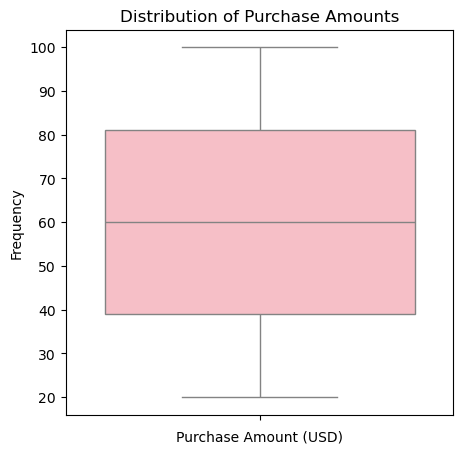

In [117]:
# Plot the boxplot of purchase amounts

plt.figure(figsize=(5,5))
sns.boxplot(df['Purchase Amount (USD)'], color='lightpink')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

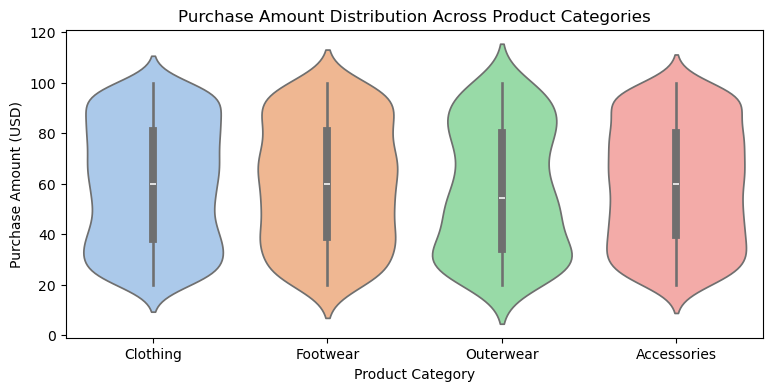

In [118]:
# Create a violin plot to visualize the distribution of purchase amounts for each product category

plt.figure(figsize=(9,4))
sns.violinplot(x='Category', y='Purchase Amount (USD)', data=df, palette='pastel', hue='Category')
plt.title('Purchase Amount Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()

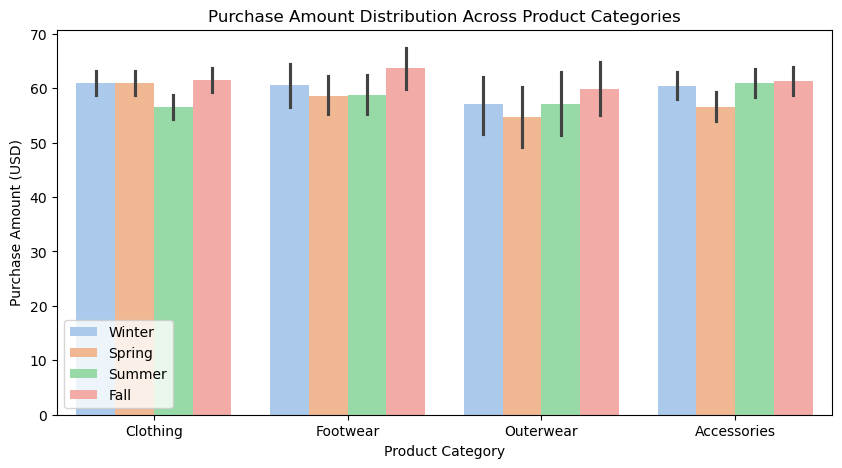

In [119]:
# Plot the purchase amount for each product category by season

plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, palette='pastel', hue='Season')
plt.title('Purchase Amount Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount (USD)')
plt.legend(loc= 'lower left')
plt.show()

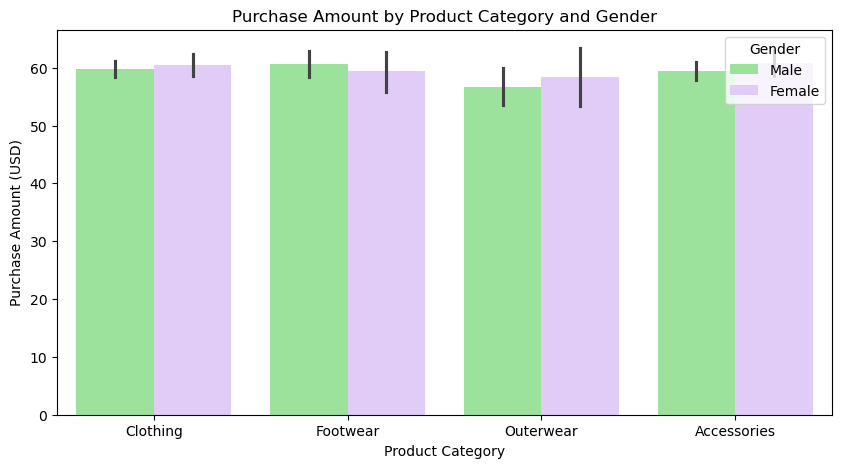

In [120]:
# Plot the purchase amount for each product category by gender

plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=df, palette=['lightgreen','#dfc5fe'])
plt.title('Purchase Amount by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Gender',loc= 'upper right')
plt.show()

#### Frequency of Purchases

In [122]:
# Check unique values in 'Frequency of Purchases' column
print("Unique values in 'Frequency of Purchases' column:\n", df['Frequency of Purchases'].unique())

Unique values in 'Frequency of Purchases' column:
 ['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [123]:
# Count the frequency of each value
frequency_counts = df['Frequency of Purchases'].value_counts()
frequency_counts

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

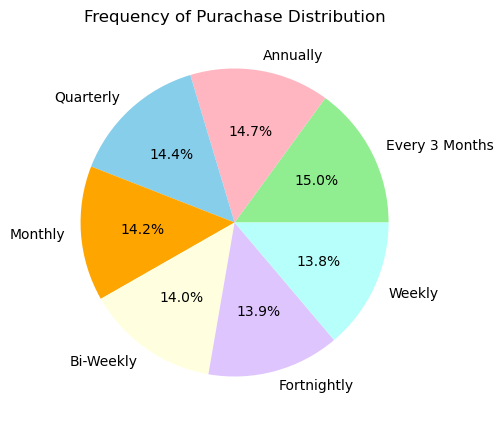

In [124]:
# Plot distribution of frequency of purchase

plt.figure(figsize=(9,5))
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'lightpink','skyblue','orange','lightyellow','#dfc5fe','#b7fffa'])
plt.title('Frequency of Purachase Distribution')
plt.show()

In [125]:
# Calculate frequency of purcharses with respect to the Subscription Status

df.groupby('Subscription Status')['Frequency of Purchases'].value_counts(normalize=True)*100

Subscription Status  Frequency of Purchases
No                   Every 3 Months            15.103618
                     Quarterly                 14.857745
                     Annually                  14.471373
                     Bi-Weekly                 14.295750
                     Monthly                   14.190376
                     Fortnightly               13.663505
                     Weekly                    13.417633
Yes                  Annually                  15.194682
                     Weekly                    14.909782
                     Every 3 Months            14.624881
                     Fortnightly               14.529915
                     Monthly                   14.150047
                     Bi-Weekly                 13.295347
                     Quarterly                 13.295347
Name: proportion, dtype: float64

- The `Frequency of Purchases` for customers having `No Subscription` is **Every 3 Months** with 15.01% 
- For customers having *opted for Subscription* the `Frequency of Purchases` is **Annually**.

In [127]:
# Calculate frequency of purcharses with respect to the Promo Code Used

df.groupby('Promo Code Used')['Frequency of Purchases'].value_counts(normalize=True)*100

Promo Code Used  Frequency of Purchases
No               Annually                  15.024741
                 Every 3 Months            14.664867
                 Quarterly                 14.484930
                 Bi-Weekly                 14.439946
                 Monthly                   14.215025
                 Weekly                    13.720198
                 Fortnightly               13.450292
Yes              Every 3 Months            15.384615
                 Fortnightly               14.490161
                 Quarterly                 14.370900
                 Annually                  14.192010
                 Monthly                   14.132379
                 Weekly                    13.953488
                 Bi-Weekly                 13.476446
Name: proportion, dtype: float64

- In case when `Promo Code Used` is used, the `Frequency of Purchases` is **Every 3 Months** with **15.39%**, where as when `Promo Code Used` isn't used, the `Frequency of Purchases` is **Annually**.

In [129]:
# Calculate frequency of purcharses with respect to the Discount Applied

df.groupby('Discount Applied')['Frequency of Purchases'].value_counts(normalize=True)*100

Discount Applied  Frequency of Purchases
No                Annually                  15.024741
                  Every 3 Months            14.664867
                  Quarterly                 14.484930
                  Bi-Weekly                 14.439946
                  Monthly                   14.215025
                  Weekly                    13.720198
                  Fortnightly               13.450292
Yes               Every 3 Months            15.384615
                  Fortnightly               14.490161
                  Quarterly                 14.370900
                  Annually                  14.192010
                  Monthly                   14.132379
                  Weekly                    13.953488
                  Bi-Weekly                 13.476446
Name: proportion, dtype: float64

- When `Discount` is applied, the `Frequency of Purachases` is **Every 3 Months** with **15.39%**, on the other hand when `Discount` is not applied, <br>the `Frequency of Purachases` is **Annually**.

In [131]:
# Create a new DataFrame to store the age group and their counts

age_group = {
    '18-25': range(18, 26),
    '26-35': range(26, 36),
    '36-50': range(36, 51),
    '51-60': range(51, 61), 
    '61+': range(61, 70)
    }

# Count individuals in each age group 
age_group_counts = []

for age_range in age_group:
    count = (df[df['Age'].isin(age_group[age_range])]['Frequency of Purchases'].value_counts()).reset_index()    
    count = round(count,2)
    count.columns = ['Frequency of Purchases', 'Frequency']
    count['Age_Group'] = age_range
    age_group_counts.append(count)

# Concatenate all age group counts into a single DataFrame
age_group_df = pd.concat(age_group_counts, ignore_index=True)
age_group_df

,Frequency of Purchases,Frequency,Age_Group
0,Annually,94,18-25
1,Every 3 Months,93,18-25
2,Fortnightly,82,18-25
3,Bi-Weekly,81,18-25
4,Quarterly,79,18-25
5,Weekly,71,18-25
6,Monthly,71,18-25
7,Bi-Weekly,121,26-35
8,Every 3 Months,113,26-35
9,Quarterly,109,26-35


- #### Key Pointers:
    1. **When Discount and Promo code is applied the frequency of purchases has been *Every 3 months* , impliying that the providing discounts <br>and promo code might be benefical.**
    
    2. On the other hand **customers with No Subscription** have purchase frequency of **Every 3 Months**, where as customers who opted for subscription <br>have annual purchase frequency, hence more attention should be paid to the audience who have not opted for subscription to boost sales.

    3. For the target age group of 36-50, the frequency of purchases is **Every 3 months**.
       
    4. For the different age groups the frequency of purchase is expressed as follows:

| Age Group|       FoP      |  Frequency (%) |
|:---------|:--------------:|---------------:|
|  18-25   |  Annually      |     94 
|  26-35   |  Bi-weekly     |      121     |
|  36-50   |  Every 3 Months|      171     |
|  51-60   |  Quarterly     |      113     |
|   61+    |  Quarterly     |      112     |   |

---